In [7]:
from ultralytics import YOLO
import cv2
import os

# Load the YOLO model
model = YOLO(r"C:\Users\oussa\Downloads\best.pt")

# Path to the directory containing the images
image_dir = r"C:\work\yolo8\output_images"

# Create a directory to save the cropped images
output_dir = "pmi_figures"
os.makedirs(output_dir, exist_ok=True)

# Loop through each image in the directory
for filename in os.listdir(image_dir):
    if filename.endswith((".jpg", ".jpeg", ".png")):
        img_path = os.path.join(image_dir, filename)
        img = cv2.imread(img_path)

        # Make predictions
        results = model.predict(img_path)

        for idx, result in enumerate(results):
            for box in result.boxes:
                conf = box.conf[0].item()

                if conf > 0.9:
                    x1, y1, x2, y2 = box.xyxy[0].int().tolist()

                    # Crop the region of interest (ROI)
                    roi = img[y1:y2, x1:x2]

                    # Save the cropped ROI as a separate image
                    roi_filename = os.path.join(output_dir, f"{filename}_roi_{idx}_{conf:.2f}.jpg")
                    cv2.imwrite(roi_filename, roi)



image 1/1 C:\work\yolo8\output_images\page_1.png: 640x512 1 figures-in-pdfs, 64.7ms
Speed: 4.5ms preprocess, 64.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)

image 1/1 C:\work\yolo8\output_images\page_10.png: 640x512 1 figures-in-pdfs, 60.5ms
Speed: 9.0ms preprocess, 60.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)

image 1/1 C:\work\yolo8\output_images\page_100.png: 640x512 1 figures-in-pdfs, 12.9ms
Speed: 9.6ms preprocess, 12.9ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 512)

image 1/1 C:\work\yolo8\output_images\page_101.png: 640x512 2 figures-in-pdfss, 24.9ms
Speed: 5.0ms preprocess, 24.9ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 512)

image 1/1 C:\work\yolo8\output_images\page_102.png: 640x512 6 figures-in-pdfss, 19.8ms
Speed: 1.0ms preprocess, 19.8ms inference, 9.0ms postprocess per image at shape (1, 3, 640, 512)

image 1/1 C:\work\yolo8\output_images\page_103.png: 640x512 2 figures-in-pdfss, 


0: 640x512 1 figures-in-pdfs, 67.0ms
Speed: 0.0ms preprocess, 67.0ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 512)


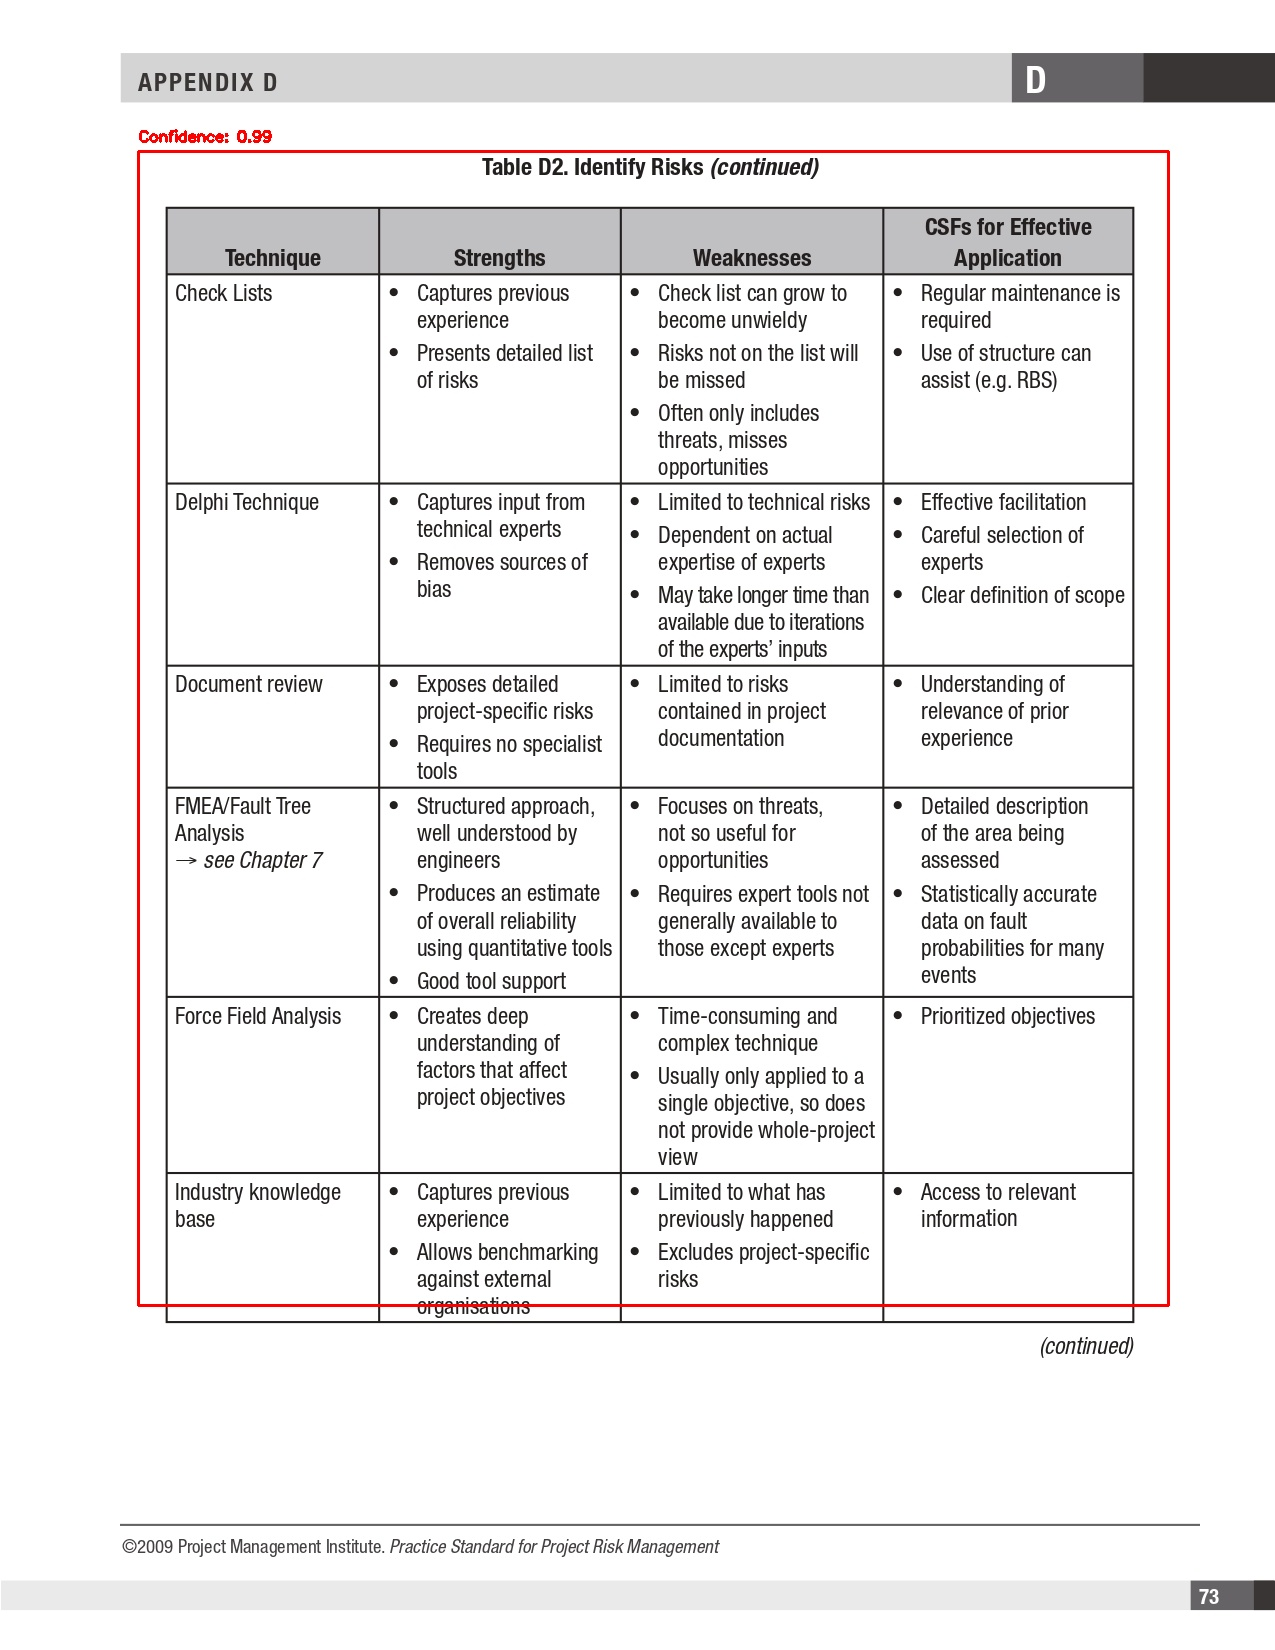

In [3]:
from ultralytics import YOLO
import cv2
from IPython.display import Image, display

# Load the YOLO model
model = YOLO(r"C:\Users\oussa\Downloads\best.pt")

# Specify the path to your image
img_path = r"C:\Users\oussa\Downloads\ilovepdf_pages-to-jpg (1)\practice-standard-project-risk-management_page-0085.jpg"

# Load the image
img = cv2.imread(img_path)

# Check if the image was loaded successfully
if img is None:
    print(f"Failed to load the image from {img_path}")
else:
    # Perform object detection
    results = model.predict(img)

    for result in results:
        for box in result.boxes:
            conf = box.conf[0].item()
            cls = int(box.cls[0])

            if conf > 0.9:
                x1, y1, x2, y2 = box.xyxy[0].int().tolist()
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

                # Add a label with confidence
                label = f"Confidence: {conf:.2f}"
                cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    # Save the modified image
    output_path = "output_image.jpg"
    cv2.imwrite(output_path, img)

    # Display the saved image using IPython's display module
    display(Image(filename=output_path))


### Convert PDF pages to Images

In [4]:
import fitz  # PyMuPDF
import os

def pdf_to_image(pdf_path, page_number, output_dir):
    try:
        # Open the PDF file
        pdf_document = fitz.open(pdf_path)
        
        # Check if the page number is within the valid range
        if 0 < page_number <= len(pdf_document):
            page = pdf_document.load_page(page_number - 1)
            image = page.get_pixmap()
            
            # Save the image as a PNG file (you can change the format if needed)
            output_image_path = os.path.join(output_dir, f'page_{page_number}.png')
            image.save(output_image_path, 'png')
            
            print(f"Page {page_number} converted to {output_image_path}")
        else:
            print(f"Invalid page number: {page_number}")

    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    # Input PDF file path
    pdf_file = r"C:\Users\oussa\Downloads\practice-standard-project-risk-management.pdf"
    
    # Page number to convert
    page_number = 40
    
    # Output directory
    output_directory = "output_images"
    os.makedirs(output_directory, exist_ok=True)
    
    pdf_to_image(pdf_file, page_number, output_directory)


Page 40 converted to output_images\page_40.png


In [5]:
import fitz  # PyMuPDF
import os

def pdf_to_images(pdf_path, output_dir):
    try:
        # Open the PDF file
        pdf_document = fitz.open(pdf_path)
        
        # Create the output directory if it doesn't exist
        os.makedirs(output_dir, exist_ok=True)

        # Loop through all the pages and convert each to an image
        for page_number in range(len(pdf_document)):
            page = pdf_document.load_page(page_number)
            image = page.get_pixmap()
            
            # Save each page as an image (you can change the format if needed)
            output_image_path = os.path.join(output_dir, f'page_{page_number + 1}.png')
            image.save(output_image_path, 'png')
            
            print(f"Page {page_number + 1} converted to {output_image_path}")

    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    # Input PDF file path
    pdf_file = r"C:\Users\oussa\Downloads\practice-standard-project-risk-management.pdf"
    
    # Output directory
    output_directory = "output_images"
    
    pdf_to_images(pdf_file, output_directory)


Page 1 converted to output_images\page_1.png
Page 2 converted to output_images\page_2.png
Page 3 converted to output_images\page_3.png
Page 4 converted to output_images\page_4.png
Page 5 converted to output_images\page_5.png
Page 6 converted to output_images\page_6.png
Page 7 converted to output_images\page_7.png
Page 8 converted to output_images\page_8.png
Page 9 converted to output_images\page_9.png
Page 10 converted to output_images\page_10.png
Page 11 converted to output_images\page_11.png
Page 12 converted to output_images\page_12.png
Page 13 converted to output_images\page_13.png
Page 14 converted to output_images\page_14.png
Page 15 converted to output_images\page_15.png
Page 16 converted to output_images\page_16.png
Page 17 converted to output_images\page_17.png
Page 18 converted to output_images\page_18.png
Page 19 converted to output_images\page_19.png
Page 20 converted to output_images\page_20.png
Page 21 converted to output_images\page_21.png
Page 22 converted to output_ima